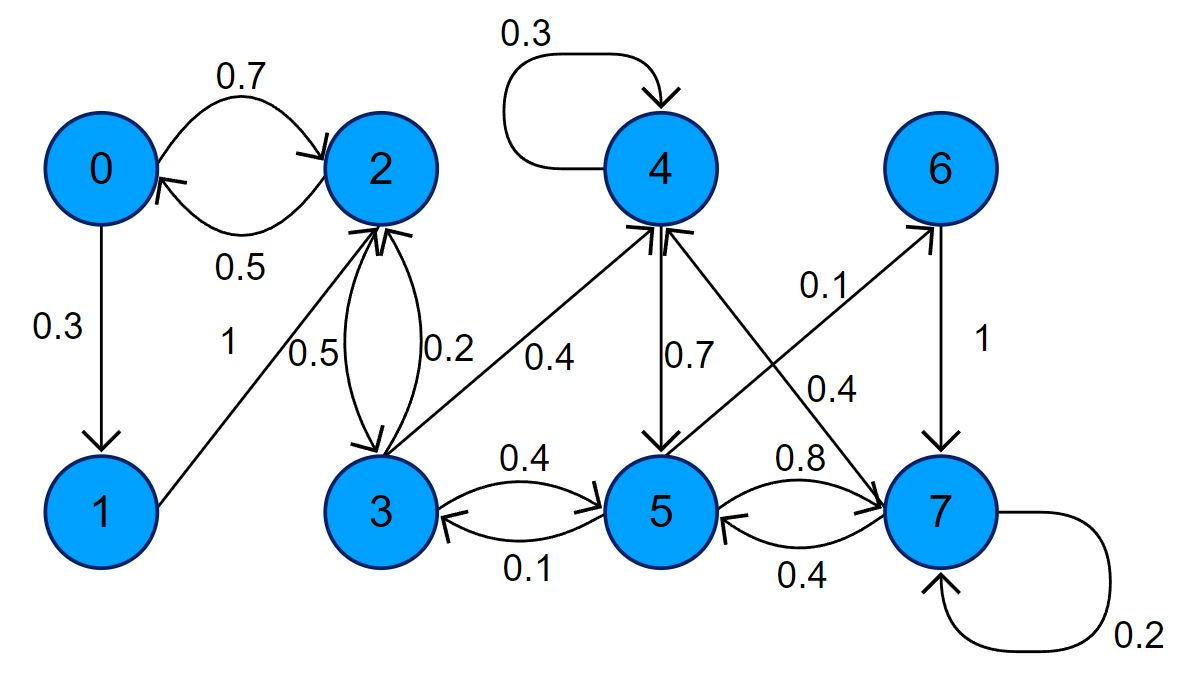

https://www.yworks.com/yed-live/?file=https://gist.githubusercontent.com/Bazalii/17d0e8fc4a54ab640fed5a8f4f081a72/raw/1b625f534f0885758d90cff88a1eebb492bc8aab/Untitled%20Document

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def MakeDetour(probabilities, start_position, iterations, standard_deviation):
    deviation = 1
    previous_probabilities = []
    current_probabilities = start_position
    deviations = []

    for iteration in range(iterations):
        if deviation < standard_deviation:
            break
        previous_probabilities = current_probabilities
        current_probabilities = previous_probabilities @ probabilities
        deviation = np.linalg.norm(current_probabilities - previous_probabilities)
        deviations.append(deviation)

    return current_probabilities, deviations

In [ ]:
def solve_analytically(probabilities):
    probabilities = probabilities.T - np.eye(probabilities.shape[0])
    probabilities[7] = np.ones((1, probabilities.shape[0]))

    b = np.zeros(probabilities.shape[0])
    b[-1] = 1

    return np.linalg.solve(probabilities, b)

In [ ]:
markov_chain_probabilities = [
                                                    [0, 0.3, 0.7, 0, 0, 0, 0, 0],
                                                    [0, 0, 1, 0, 0, 0, 0, 0],
                                                    [0.5, 0, 0, 0.5, 0, 0, 0, 0],
                                                    [0, 0, 0.2, 0, 0.4, 0.4, 0, 0],
                                                    [0, 0, 0, 0, 0.3, 0.7, 0, 0],
                                                    [0, 0, 0, 0.1, 0, 0, 0.1, 0.8],
                                                    [0, 0, 0, 0, 0, 0, 0, 1],
                                                    [0, 0, 0, 0.4, 0.4, 0, 0.2, 0],
                                                ]

In [ ]:
first_start_position = [[0.1, 0.2, 0.07, 0.4, 0, 0.03, 0.1, 0.1]]
second_start_position = [[0.1, 0.05, 0.2, 0.1, 0.05, 0.2, 0.1, 0.2]]

In [ ]:
first_probabilities, first_deviations = MakeDetour(np.array(markov_chain_probabilities), np.array(first_start_position), 20000, 0.000001)
second_probabilities, second_deviations = MakeDetour(np.array(markov_chain_probabilities), np.array(second_start_position), 20000, 0.000001)

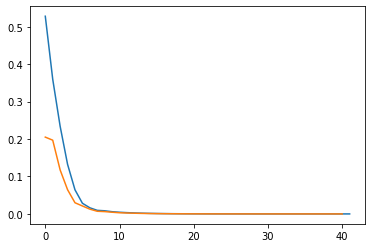

In [ ]:
plt.plot(first_deviations)
plt.plot(second_deviations)

In [ ]:
def round_values(list):
    return np.round(list, decimals=5)

In [ ]:
print(round_values(first_probabilities))
print(round_values(second_probabilities))
print(round_values(solve_analytically(np.array(markov_chain_probabilities))))

[[0.02972 0.00892 0.05944 0.14859 0.22384 0.21612 0.07024 0.24314]]
[[0.02972 0.00892 0.05944 0.14859 0.22384 0.21612 0.07024 0.24314]]
[0.02972 0.00892 0.05943 0.14859 0.22384 0.21612 0.07024 0.24314]
